In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
def load_data(sub_sample=True, add_outlier=False):
    """Load data and convert it to the metrics system."""
    path_dataset = "height_weight_genders.csv"
    data = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[1, 2])
    height = data[:, 0]
    weight = data[:, 1]
    gender = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[0],
        converters={0: lambda x: 0 if b"Male" in x else 1})
    # Convert to metric system
    height *= 0.025
    weight *= 0.454

    # sub-sample
    if sub_sample:
        height = height[::50]
        weight = weight[::50]

    if add_outlier:
        # outlier experiment
        height = np.concatenate([height, [1.1, 1.2]])
        weight = np.concatenate([weight, [51.5/0.454, 55.3/0.454]])

    return height, weight, gender


def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x)
    x = x - mean_x
    std_x = np.std(x)
    x = x / std_x
    return x, mean_x, std_x


def build_model_data(height, weight):
    """Form (y,tX) to get regression data in matrix form."""
    y = weight
    x = height
    num_samples = len(y)
    tx = np.c_[np.ones(num_samples), x]
    return y, tx

In [4]:
import datetime

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [9]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    return  np.mean((y- np.dot(tx,w))**2)*0.5
    # ***************************************************

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for i,row in enumerate(w0):
        for j,col in enumerate(w1):
            losses[i,j]=compute_loss(y,tx,(row,col))
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=848489.6629356495, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.854 seconds


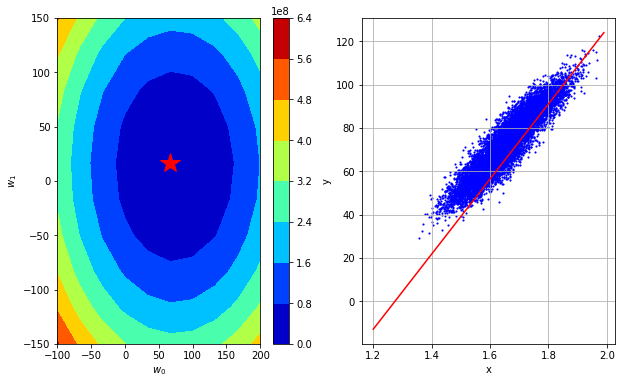

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [115]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-np.dot(tx,w)
    return -np.dot(tx.T,e)/len(y)
    # ***************************************************

Please fill in the functions `gradient_descent` below:

In [53]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = []
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient=compute_gradient(y, tx, w)
        w=w-gamma*gradient
        loss=compute_loss(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    print("loss 1:{0}".format(losses[np.argmin(losses)]))
    print("loss 2:{0}".format(losses[-1]))
    print(ws[np.argmin(losses)])
    print(ws[-1])
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [54]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=266.58539632874687, w0=51.311949971831574, w1=9.375829281932592
Gradient Descent(1/49): loss=39.20238275561819, w0=66.70553496338115, w1=12.188578066512369
Gradient Descent(2/49): loss=18.737911534036595, w0=71.32361046084603, w1=13.032402701886323
Gradient Descent(3/49): loss=16.896109124094252, w0=72.70903311008549, w1=13.285550092498509
Gradient Descent(4/49): loss=16.73034690719944, w0=73.12465990485732, w1=13.361494309682165
Gradient Descent(5/49): loss=16.715428307678906, w0=73.24934794328887, w1=13.384277574837261
Gradient Descent(6/49): loss=16.714085633722057, w0=73.28675435481834, w1=13.39111255438379
Gradient Descent(7/49): loss=16.713964793065944, w0=73.29797627827718, w1=13.393163048247748
Gradient Descent(8/49): loss=16.713953917406897, w0=73.30134285531484, w1=13.393778196406936
Gradient Descent(9/49): loss=16.71395293859758, w0=73.30235282842614, w1=13.393962740854693
Gradient Descent(10/49): loss=16.71395285050474, w0=73.30265582035952, w1=

In [42]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [99]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]

In [111]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y-np.dot(tx,w)
    return -np.dot(tx.T,e)/len(y)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
            gradient=compute_gradient(minibatch_y, minibatch_tx, w)
            w=w-gamma*gradient
            loss=compute_loss(minibatch_y, minibatch_tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
            
    return losses,ws

In [112]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=18281.776848664238, w0=52.087135054731235, w1=6.717713003662432
Gradient Descent(1/49): loss=3367.2656574495504, w0=67.32990605985906, w1=9.193367497718189
Gradient Descent(2/49): loss=1253.708906231394, w0=69.08416565100046, w1=10.553246162285708
Gradient Descent(3/49): loss=794.2677685535807, w0=72.51564129440331, w1=13.291050881379052
Gradient Descent(4/49): loss=862.5389166853323, w0=73.82746431578524, w1=14.241668079816842
Gradient Descent(5/49): loss=990.1489311703085, w0=73.9539815124519, w1=13.91737536863927
Gradient Descent(6/49): loss=777.2809413411503, w0=71.8478566418443, w1=12.842722324892241
Gradient Descent(7/49): loss=1310.0413736960704, w0=73.21701392383318, w1=13.186043974918968
Gradient Descent(8/49): loss=1018.8356781078219, w0=73.68038034448772, w1=13.135116794724853
Gradient Descent(9/49): loss=1138.2766696266071, w0=72.71812522102596, w1=14.217543676175442
Gradient Descent(10/49): loss=552.2791156375406, w0=73.63673142289868, w1=14.54

In [110]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [114]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

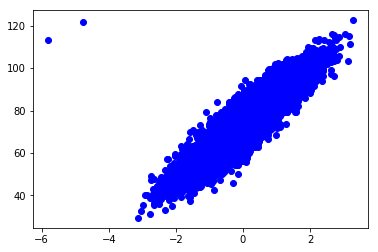

In [120]:
plt.plot(x,y,'bo')

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [121]:
def compute_loss_MAE(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    return  np.sum(np.abs(y- np.dot(tx,w)))
    # ***************************************************